In [1]:
# Library imports.
from pyswmm import Simulation, Links, Output
from swmm.toolkit.shared_enum import LinkAttribute, NodeAttribute, SubcatchAttribute
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import time

# Local imports.
from urbansurge import swmm_model, analysis_tools

In [2]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\canandaigua_config_physical.yml"

In [3]:
# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-10-17 00:00:00
Start Time: 2020-11-16 23:55:00


In [6]:
# Silting depths.
storage_id = 21
Ksat_values = list(np.round(np.linspace(0, 1, 5),2))
print(Ksat_values)

[0.0, 0.25, 0.5, 0.75, 1.0]


In [7]:
# List of output data frames.
output_df_list = []

# Run the simulation with different roughness settings.
for i, Ksat in enumerate(Ksat_values):
   
    # Update the saturated hydraulic conductivity.
    swmm.set_storage_property(storage_id, 'Ksat', Ksat)
    
    # Run the simulation.
    swmm.run_simulation()
    
    # OUTPUT TO DATA FRAME
    # ---------------------------------------------------------------------
    # Get the node depths.
    node_depth_df = swmm.get_node_depth()

    # Get node flooding.
    node_flood_df = swmm.get_node_flooding()
    
    # Get node inflow.
    node_total_inflow_df = swmm.get_node_total_inflow()

    # Get link flow.
    link_flow_df = swmm.get_link_flow()
    
    # Get link depth.
    link_depth_df = swmm.get_link_depth()
    
    # Get link velocity.
    link_velocity_df = swmm.get_link_velocity()

    # Get precipitation time series.
    prcp_df = swmm.get_rainfall_timeseries()

    # Join data frames.
    fault_df = node_depth_df.merge(node_flood_df, on='datetime')
    fault_df = fault_df.merge(node_total_inflow_df, on='datetime')
    fault_df = fault_df.merge(link_flow_df, on='datetime')
    fault_df = fault_df.merge(link_depth_df, on='datetime')
    fault_df = fault_df.merge(link_velocity_df, on='datetime')
    fault_df = fault_df.merge(prcp_df, on='datetime')

    # Add experiment name.
    fault_df['Experiment'] = f'E_{i}'
        
    # Add link roughness.
    fault_df[f'Storage_{storage_id}_Ksat'] = Ksat

    # Add to list.
    output_df_list.append(fault_df)

    # ---------------------------------------------------------------------
    
output_df = pd.concat(output_df_list)

Updated Ksat value to 0.0 for 21 in 21
Set Storage 21 Ksat to 0.0
INP PATH: C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\Canandaigua_physical_system_tmp.inp
2020-10-17 00:00:01 , 0
2020-10-17 00:50:01 , 0
2020-10-17 01:40:01 , 0
2020-10-17 02:30:01 , 0
2020-10-17 03:20:01 , 0
2020-10-17 04:10:01 , 1
2020-10-17 05:00:01 , 1
2020-10-17 05:50:01 , 1
2020-10-17 06:40:01 , 1
2020-10-17 07:30:01 , 1
2020-10-17 08:20:01 , 1
2020-10-17 09:10:01 , 1
2020-10-17 10:00:01 , 1
2020-10-17 10:50:01 , 1
2020-10-17 11:40:01 , 2
2020-10-17 12:30:01 , 2
2020-10-17 13:20:01 , 2
2020-10-17 14:10:01 , 2
2020-10-17 15:00:01 , 2
2020-10-17 15:50:01 , 2
2020-10-17 16:40:01 , 2
2020-10-17 17:30:01 , 2
2020-10-17 18:20:01 , 2
2020-10-17 19:10:01 , 3
2020-10-17 20:00:01 , 3
2020-10-17 20:50:01 , 3
2020-10-17 21:40:01 , 3
2020-10-17 22:30:01 , 3
2020-10-17 23:20:01 , 3
2020-10-18 00:10:01 , 3
2020-10-18 01:00:01 , 3
2020-10-18 01:50:01 , 3
2020-10-18 02:40:01 , 4
2020-10-18 03:30:01 , 4
20

2020-10-29 01:41:54 , 39
2020-10-29 02:31:54 , 39
2020-10-29 03:21:54 , 39
2020-10-29 04:11:54 , 39
2020-10-29 05:01:54 , 39
2020-10-29 05:51:54 , 40
2020-10-29 06:41:54 , 40
2020-10-29 07:31:54 , 40
2020-10-29 08:21:54 , 40
2020-10-29 09:11:54 , 40
2020-10-29 10:01:54 , 40
2020-10-29 10:51:54 , 40
2020-10-29 11:41:54 , 40
2020-10-29 12:31:54 , 40
2020-10-29 13:21:54 , 41
2020-10-29 14:11:54 , 41
2020-10-29 15:01:54 , 41
2020-10-29 15:51:54 , 41
2020-10-29 16:41:54 , 41
2020-10-29 17:31:54 , 41
2020-10-29 18:21:54 , 41
2020-10-29 19:11:54 , 41
2020-10-29 20:01:54 , 41
2020-10-29 20:51:54 , 42
2020-10-29 21:41:54 , 42
2020-10-29 22:31:54 , 42
2020-10-29 23:21:54 , 42
2020-10-30 00:11:54 , 42
2020-10-30 01:01:54 , 42
2020-10-30 01:51:54 , 42
2020-10-30 02:41:54 , 42
2020-10-30 03:31:54 , 42
2020-10-30 04:21:54 , 43
2020-10-30 05:11:54 , 43
2020-10-30 06:01:54 , 43
2020-10-30 06:51:54 , 43
2020-10-30 07:41:54 , 43
2020-10-30 08:31:54 , 43
2020-10-30 09:21:54 , 43
2020-10-30 10:11:54 , 43


2020-11-10 16:30:43 , 80
2020-11-10 17:20:43 , 80
2020-11-10 18:10:43 , 80
2020-11-10 19:00:43 , 80
2020-11-10 19:50:43 , 80
2020-11-10 20:40:43 , 80
2020-11-10 21:30:43 , 80
2020-11-10 22:20:43 , 80
2020-11-10 23:10:43 , 81
2020-11-11 00:00:43 , 81
2020-11-11 00:50:43 , 81
2020-11-11 01:40:43 , 81
2020-11-11 02:30:43 , 81
2020-11-11 03:20:43 , 81
2020-11-11 04:10:43 , 81
2020-11-11 05:00:43 , 81
2020-11-11 05:50:43 , 81
2020-11-11 06:40:43 , 82
2020-11-11 07:30:43 , 82
2020-11-11 08:20:43 , 82
2020-11-11 09:10:43 , 82
2020-11-11 10:00:43 , 82
2020-11-11 10:50:43 , 82
2020-11-11 11:40:43 , 82
2020-11-11 12:30:43 , 82
2020-11-11 13:20:43 , 82
2020-11-11 14:10:43 , 83
2020-11-11 15:00:43 , 83
2020-11-11 15:50:43 , 83
2020-11-11 16:40:43 , 83
2020-11-11 17:30:43 , 83
2020-11-11 18:20:43 , 83
2020-11-11 19:10:43 , 83
2020-11-11 20:00:43 , 83
2020-11-11 20:50:43 , 83
2020-11-11 21:40:43 , 84
2020-11-11 22:30:43 , 84
2020-11-11 23:20:43 , 84
2020-11-12 00:10:43 , 84
2020-11-12 01:00:43 , 84


2020-10-22 04:44:22 , 17
2020-10-22 05:34:22 , 17
2020-10-22 06:24:22 , 17
2020-10-22 07:14:22 , 17
2020-10-22 08:04:22 , 17
2020-10-22 08:54:22 , 17
2020-10-22 09:44:22 , 17
2020-10-22 10:34:22 , 18
2020-10-22 11:24:22 , 18
2020-10-22 12:14:22 , 18
2020-10-22 13:04:22 , 18
2020-10-22 13:54:22 , 18
2020-10-22 14:44:22 , 18
2020-10-22 15:34:22 , 18
2020-10-22 16:24:22 , 18
2020-10-22 17:14:22 , 18
2020-10-22 18:04:22 , 19
2020-10-22 18:54:22 , 19
2020-10-22 19:44:22 , 19
2020-10-22 20:34:22 , 19
2020-10-22 21:24:22 , 19
2020-10-22 22:14:22 , 19
2020-10-22 23:04:22 , 19
2020-10-22 23:54:22 , 19
2020-10-23 00:44:22 , 19
2020-10-23 01:34:22 , 20
2020-10-23 02:24:22 , 20
2020-10-23 03:14:22 , 20
2020-10-23 04:04:22 , 20
2020-10-23 04:54:22 , 20
2020-10-23 05:44:22 , 20
2020-10-23 06:34:22 , 20
2020-10-23 07:24:22 , 20
2020-10-23 08:14:22 , 20
2020-10-23 09:04:22 , 21
2020-10-23 09:54:22 , 21
2020-10-23 10:44:22 , 21
2020-10-23 11:34:22 , 21
2020-10-23 12:24:22 , 21
2020-10-23 13:14:22 , 21


2020-11-02 22:57:05 , 55
2020-11-02 23:43:38 , 55
2020-11-03 00:27:28 , 55
2020-11-03 01:13:53 , 55
2020-11-03 02:03:25 , 55
2020-11-03 02:53:25 , 55
2020-11-03 03:43:25 , 55
2020-11-03 04:33:25 , 55
2020-11-03 05:23:25 , 56
2020-11-03 06:13:25 , 56
2020-11-03 07:03:25 , 56
2020-11-03 07:53:25 , 56
2020-11-03 08:43:25 , 56
2020-11-03 09:33:25 , 56
2020-11-03 10:23:25 , 56
2020-11-03 11:13:25 , 56
2020-11-03 12:03:25 , 56
2020-11-03 12:53:25 , 57
2020-11-03 13:43:25 , 57
2020-11-03 14:33:25 , 57
2020-11-03 15:23:25 , 57
2020-11-03 16:13:25 , 57
2020-11-03 17:03:25 , 57
2020-11-03 17:53:25 , 57
2020-11-03 18:43:25 , 57
2020-11-03 19:33:25 , 57
2020-11-03 20:23:25 , 58
2020-11-03 21:13:25 , 58
2020-11-03 22:03:25 , 58
2020-11-03 22:53:25 , 58
2020-11-03 23:43:25 , 58
2020-11-04 00:33:25 , 58
2020-11-04 01:23:25 , 58
2020-11-04 02:13:25 , 58
2020-11-04 03:03:25 , 58
2020-11-04 03:53:25 , 59
2020-11-04 04:43:25 , 59
2020-11-04 05:33:25 , 59
2020-11-04 06:23:25 , 59
2020-11-04 07:13:25 , 59


2020-11-15 15:43:25 , 96
2020-11-15 16:33:25 , 96
2020-11-15 17:23:25 , 96
2020-11-15 18:13:25 , 96
2020-11-15 19:03:25 , 96
2020-11-15 19:53:25 , 96
2020-11-15 20:43:25 , 96
2020-11-15 21:33:25 , 96
2020-11-15 22:23:25 , 97
2020-11-15 23:13:25 , 97
2020-11-16 00:03:25 , 97
2020-11-16 00:53:25 , 97
2020-11-16 01:43:25 , 97
2020-11-16 02:33:25 , 97
2020-11-16 03:23:25 , 97
2020-11-16 04:13:25 , 97
2020-11-16 05:03:25 , 97
2020-11-16 05:53:25 , 98
2020-11-16 06:43:25 , 98
2020-11-16 07:33:25 , 98
2020-11-16 08:23:25 , 98
2020-11-16 09:13:25 , 98
2020-11-16 10:03:25 , 98
2020-11-16 10:53:25 , 98
2020-11-16 11:43:25 , 98
2020-11-16 12:33:25 , 98
2020-11-16 13:23:25 , 99
2020-11-16 14:13:25 , 99
2020-11-16 15:03:25 , 99
2020-11-16 15:53:25 , 99
2020-11-16 16:43:25 , 99
2020-11-16 17:33:25 , 99
2020-11-16 18:23:25 , 99
2020-11-16 19:13:25 , 99
2020-11-16 20:03:25 , 99
2020-11-16 20:53:25 , 100
2020-11-16 21:43:25 , 100
2020-11-16 22:33:25 , 100
2020-11-16 23:23:25 , 100
Updated Ksat value to

2020-10-27 14:44:32 , 34
2020-10-27 15:34:32 , 34
2020-10-27 16:24:32 , 34
2020-10-27 17:14:32 , 35
2020-10-27 18:04:32 , 35
2020-10-27 18:54:32 , 35
2020-10-27 19:44:32 , 35
2020-10-27 20:34:32 , 35
2020-10-27 21:24:32 , 35
2020-10-27 22:14:32 , 35
2020-10-27 23:04:32 , 35
2020-10-27 23:54:32 , 35
2020-10-28 00:44:32 , 36
2020-10-28 01:34:32 , 36
2020-10-28 02:24:32 , 36
2020-10-28 03:14:32 , 36
2020-10-28 04:04:32 , 36
2020-10-28 04:54:32 , 36
2020-10-28 05:44:32 , 36
2020-10-28 06:34:32 , 36
2020-10-28 07:24:32 , 36
2020-10-28 08:14:32 , 37
2020-10-28 09:04:32 , 37
2020-10-28 09:54:32 , 37
2020-10-28 10:44:32 , 37
2020-10-28 11:34:32 , 37
2020-10-28 12:24:32 , 37
2020-10-28 13:14:32 , 37
2020-10-28 14:04:32 , 37
2020-10-28 14:54:32 , 37
2020-10-28 15:44:32 , 38
2020-10-28 16:34:32 , 38
2020-10-28 17:24:32 , 38
2020-10-28 18:14:32 , 38
2020-10-28 19:04:32 , 38
2020-10-28 19:54:32 , 38
2020-10-28 20:44:32 , 38
2020-10-28 21:34:32 , 38
2020-10-28 22:24:32 , 39
2020-10-28 23:14:32 , 39


2020-11-08 23:46:08 , 74
2020-11-09 00:36:08 , 74
2020-11-09 01:26:08 , 74
2020-11-09 02:16:08 , 75
2020-11-09 03:06:08 , 75
2020-11-09 03:56:08 , 75
2020-11-09 04:46:08 , 75
2020-11-09 05:36:08 , 75
2020-11-09 06:26:08 , 75
2020-11-09 07:16:08 , 75
2020-11-09 08:06:08 , 75
2020-11-09 08:56:08 , 75
2020-11-09 09:46:08 , 76
2020-11-09 10:36:08 , 76
2020-11-09 11:26:08 , 76
2020-11-09 12:16:08 , 76
2020-11-09 13:06:08 , 76
2020-11-09 13:56:08 , 76
2020-11-09 14:46:08 , 76
2020-11-09 15:36:08 , 76
2020-11-09 16:26:08 , 76
2020-11-09 17:16:08 , 77
2020-11-09 18:06:08 , 77
2020-11-09 18:56:08 , 77
2020-11-09 19:46:08 , 77
2020-11-09 20:36:08 , 77
2020-11-09 21:26:08 , 77
2020-11-09 22:16:08 , 77
2020-11-09 23:06:08 , 77
2020-11-09 23:56:08 , 77
2020-11-10 00:46:08 , 78
2020-11-10 01:36:08 , 78
2020-11-10 02:26:08 , 78
2020-11-10 03:16:08 , 78
2020-11-10 04:06:08 , 78
2020-11-10 04:56:08 , 78
2020-11-10 05:46:08 , 78
2020-11-10 06:36:08 , 78
2020-11-10 07:26:08 , 78
2020-11-10 08:16:08 , 79


2020-10-21 22:06:30 , 16
2020-10-21 22:56:30 , 16
2020-10-21 23:46:30 , 16
2020-10-22 00:36:30 , 16
2020-10-22 01:26:30 , 16
2020-10-22 02:16:30 , 16
2020-10-22 03:06:30 , 17
2020-10-22 03:56:30 , 17
2020-10-22 04:46:30 , 17
2020-10-22 05:36:30 , 17
2020-10-22 06:26:30 , 17
2020-10-22 07:16:30 , 17
2020-10-22 08:06:30 , 17
2020-10-22 08:56:30 , 17
2020-10-22 09:46:30 , 17
2020-10-22 10:36:30 , 18
2020-10-22 11:26:30 , 18
2020-10-22 12:16:30 , 18
2020-10-22 13:06:30 , 18
2020-10-22 13:56:30 , 18
2020-10-22 14:46:30 , 18
2020-10-22 15:36:30 , 18
2020-10-22 16:26:30 , 18
2020-10-22 17:16:30 , 18
2020-10-22 18:06:30 , 19
2020-10-22 18:56:30 , 19
2020-10-22 19:46:30 , 19
2020-10-22 20:36:30 , 19
2020-10-22 21:26:30 , 19
2020-10-22 22:16:30 , 19
2020-10-22 23:06:30 , 19
2020-10-22 23:56:30 , 19
2020-10-23 00:46:30 , 19
2020-10-23 01:36:30 , 20
2020-10-23 02:26:30 , 20
2020-10-23 03:16:30 , 20
2020-10-23 04:06:30 , 20
2020-10-23 04:56:30 , 20
2020-10-23 05:46:30 , 20
2020-10-23 06:36:30 , 20


2020-11-04 14:05:11 , 60
2020-11-04 14:55:11 , 60
2020-11-04 15:45:11 , 60
2020-11-04 16:35:11 , 60
2020-11-04 17:25:11 , 60
2020-11-04 18:15:11 , 61
2020-11-04 19:05:11 , 61
2020-11-04 19:55:11 , 61
2020-11-04 20:45:11 , 61
2020-11-04 21:35:11 , 61
2020-11-04 22:25:11 , 61
2020-11-04 23:15:11 , 61
2020-11-05 00:05:11 , 61
2020-11-05 00:55:11 , 61
2020-11-05 01:45:11 , 62
2020-11-05 02:35:11 , 62
2020-11-05 03:25:11 , 62
2020-11-05 04:15:11 , 62
2020-11-05 05:05:11 , 62
2020-11-05 05:55:11 , 62
2020-11-05 06:45:11 , 62
2020-11-05 07:35:11 , 62
2020-11-05 08:25:11 , 62
2020-11-05 09:15:11 , 63
2020-11-05 10:05:11 , 63
2020-11-05 10:55:11 , 63
2020-11-05 11:45:11 , 63
2020-11-05 12:35:11 , 63
2020-11-05 13:25:11 , 63
2020-11-05 14:15:11 , 63
2020-11-05 15:05:11 , 63
2020-11-05 15:55:11 , 63
2020-11-05 16:45:11 , 64
2020-11-05 17:35:11 , 64
2020-11-05 18:25:11 , 64
2020-11-05 19:15:11 , 64
2020-11-05 20:05:11 , 64
2020-11-05 20:55:11 , 64
2020-11-05 21:45:11 , 64
2020-11-05 22:35:11 , 64


2020-11-16 01:55:11 , 97
2020-11-16 02:45:11 , 97
2020-11-16 03:35:11 , 97
2020-11-16 04:25:11 , 97
2020-11-16 05:15:11 , 97
2020-11-16 06:05:11 , 98
2020-11-16 06:55:11 , 98
2020-11-16 07:45:11 , 98
2020-11-16 08:35:11 , 98
2020-11-16 09:25:11 , 98
2020-11-16 10:15:11 , 98
2020-11-16 11:05:11 , 98
2020-11-16 11:55:11 , 98
2020-11-16 12:45:11 , 98
2020-11-16 13:35:11 , 99
2020-11-16 14:25:11 , 99
2020-11-16 15:15:11 , 99
2020-11-16 16:05:11 , 99
2020-11-16 16:55:11 , 99
2020-11-16 17:45:11 , 99
2020-11-16 18:35:11 , 99
2020-11-16 19:25:11 , 99
2020-11-16 20:15:11 , 100
2020-11-16 21:05:11 , 100
2020-11-16 21:55:11 , 100
2020-11-16 22:45:11 , 100
2020-11-16 23:35:11 , 100
Updated Ksat value to 1.0 for 21 in 21
Set Storage 21 Ksat to 1.0
INP PATH: C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Canandaigua_SWMM\Canandaigua_physical_system_tmp.inp
2020-10-17 00:00:01 , 0
2020-10-17 00:50:01 , 0
2020-10-17 01:40:01 , 0
2020-10-17 02:30:01 , 0
2020-10-17 03:20:01 , 0
2020-10-17 04:10:0

2020-10-28 21:36:45 , 38
2020-10-28 22:26:45 , 39
2020-10-28 23:16:45 , 39
2020-10-29 00:06:45 , 39
2020-10-29 00:56:45 , 39
2020-10-29 01:46:45 , 39
2020-10-29 02:36:45 , 39
2020-10-29 03:26:45 , 39
2020-10-29 04:16:45 , 39
2020-10-29 05:06:45 , 39
2020-10-29 05:56:45 , 40
2020-10-29 06:46:45 , 40
2020-10-29 07:36:45 , 40
2020-10-29 08:26:45 , 40
2020-10-29 09:16:45 , 40
2020-10-29 10:06:45 , 40
2020-10-29 10:56:45 , 40
2020-10-29 11:46:45 , 40
2020-10-29 12:36:45 , 40
2020-10-29 13:26:45 , 41
2020-10-29 14:16:45 , 41
2020-10-29 15:06:45 , 41
2020-10-29 15:56:45 , 41
2020-10-29 16:46:45 , 41
2020-10-29 17:36:45 , 41
2020-10-29 18:26:45 , 41
2020-10-29 19:16:45 , 41
2020-10-29 20:06:45 , 41
2020-10-29 20:56:45 , 42
2020-10-29 21:46:45 , 42
2020-10-29 22:36:45 , 42
2020-10-29 23:26:45 , 42
2020-10-30 00:16:45 , 42
2020-10-30 01:06:45 , 42
2020-10-30 01:56:45 , 42
2020-10-30 02:46:45 , 42
2020-10-30 03:36:45 , 42
2020-10-30 04:26:45 , 43
2020-10-30 05:16:45 , 43
2020-10-30 06:06:45 , 43


2020-11-12 13:49:14 , 86
2020-11-12 14:39:14 , 86
2020-11-12 15:29:14 , 86
2020-11-12 16:19:14 , 86
2020-11-12 17:09:14 , 86
2020-11-12 17:59:14 , 86
2020-11-12 18:49:14 , 86
2020-11-12 19:39:14 , 87
2020-11-12 20:29:14 , 87
2020-11-12 21:19:14 , 87
2020-11-12 22:09:14 , 87
2020-11-12 22:59:14 , 87
2020-11-12 23:49:14 , 87
2020-11-13 00:39:14 , 87
2020-11-13 01:29:14 , 87
2020-11-13 02:19:14 , 87
2020-11-13 03:09:14 , 88
2020-11-13 03:59:14 , 88
2020-11-13 04:49:14 , 88
2020-11-13 05:39:14 , 88
2020-11-13 06:29:14 , 88
2020-11-13 07:19:14 , 88
2020-11-13 08:09:14 , 88
2020-11-13 08:59:14 , 88
2020-11-13 09:49:14 , 88
2020-11-13 10:39:14 , 89
2020-11-13 11:29:14 , 89
2020-11-13 12:19:14 , 89
2020-11-13 13:09:14 , 89
2020-11-13 13:59:14 , 89
2020-11-13 14:49:14 , 89
2020-11-13 15:39:14 , 89
2020-11-13 16:29:14 , 89
2020-11-13 17:19:14 , 89
2020-11-13 18:09:14 , 90
2020-11-13 18:59:14 , 90
2020-11-13 19:49:14 , 90
2020-11-13 20:39:14 , 90
2020-11-13 21:29:14 , 90
2020-11-13 22:19:14 , 90


C:\Users\ay434\AppData\Local\Temp\ipykernel_20172\483843746.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\ay434\AppData\Local\Temp\ipykernel_20172\483843746.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\ay434\AppData\Local\Temp\ipykernel_20172\483843746.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


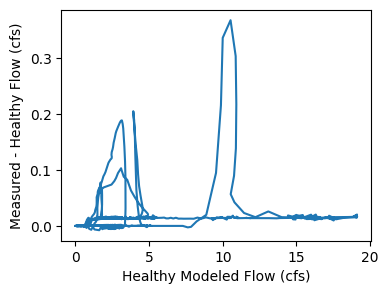

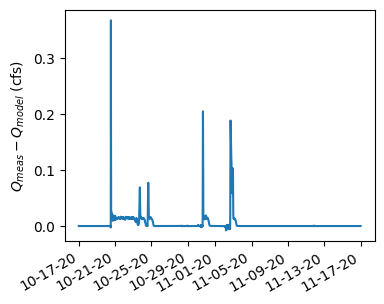

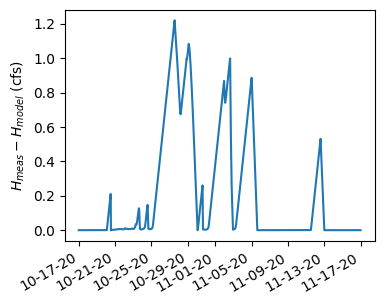

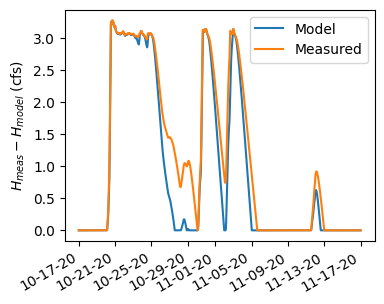

In [16]:
# Plot the output for a certain link.
plot_link_id = 10
plot_node_id = 21

# Plot flow time series against each other.
fig, ax = plt.subplots(figsize=(4,3))
plot_df_model = output_df.loc[output_df[f'Storage_{storage_id}_Ksat'] == 1.0, :]
plot_df_meas = output_df.loc[output_df[f'Storage_{storage_id}_Ksat'] == 0.75, :]
# plot_df_meas1 = output_df.loc[output_df[f'Storage_{storage_id}_Ksat'] == 1.0, :]
ax.plot(plot_df_model[f'Flow_link_{plot_link_id}'], 
           plot_df_meas[f'Flow_link_{plot_link_id}'] - plot_df_model[f'Flow_link_{plot_link_id}'])
ax.set_xlabel('Healthy Modeled Flow (cfs)')
ax.set_ylabel('Measured - Healthy Flow (cfs)')

# Residual time series.
fig, ax = plt.subplots(figsize=(4,3))
# ax.plot(plot_df_model['datetime'], plot_df_meas1[f'Flow_link_{plot_link_id}'] - plot_df_model[f'Flow_link_{plot_link_id}'])
ax.plot(plot_df_model['datetime'], plot_df_meas[f'Flow_link_{plot_link_id}'] - plot_df_model[f'Flow_link_{plot_link_id}'])
ax.set_ylabel('$Q_{meas} - Q_{model}$ (cfs)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Depth in storage over time.
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(plot_df_model['datetime'], plot_df_meas[f'Depth_node_{plot_node_id}'] - plot_df_model[f'Depth_node_{plot_node_id}'])
ax.set_ylabel('$H_{meas} - H_{model}$ (cfs)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Depth in storage over time.
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(plot_df_model['datetime'], plot_df_model[f'Depth_node_{plot_node_id}'], label='Model')
ax.plot(plot_df_model['datetime'], plot_df_meas[f'Depth_node_{plot_node_id}'], label='Measured')
ax.set_ylabel('$H_{meas} - H_{model}$ (cfs)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend()